<a id="top"></a>

# Data Preprocessing

# Outline

- [Create DataFrame](#create_dataframe)
- [Handle missing values](#handle_missing_values)
- [Center features](#center_features)
- [Scale featuers](#scale_features)
- [Map to Gaussian distribution](#map_to_gaussian)
- [Handle categorical data](#handle_categorical_data)
- [Create dummy/indicator variables](#create_indicator_variables)

## Import packages

In [1]:
# Manage data and statistics
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import skewnorm, yeojohnson, boxcox, zscore

# Plot data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from IPython.display import display, HTML, Image
%matplotlib inline

# Scale variables
from sklearn.preprocessing import scale, StandardScaler
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.preprocessing import maxabs_scale, MaxAbsScaler
from sklearn.preprocessing import robust_scale, RobustScaler

# Transform variables
from sklearn.preprocessing import quantile_transform, QuantileTransformer
from sklearn.preprocessing import power_transform, PowerTransformer

# Encode categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Discretize continuous variables
from sklearn.preprocessing import KBinsDiscretizer

# Impute missing values
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Warnings
import warnings
warnings.filterwarnings('ignore')

<a id="create_dataframe"></a>

# Create DataFrame

In [2]:
data = {
    'id': [1000, 1001, 1002, 1003, 1004, 1005, 1006],
    'date': pd.date_range('4/25/2020', periods=7, freq='D'),
    'age': [21, 56, 33, 48, 27, 42, 32],
    'income': [67000, 220000, 97000, 166000, 81000, 157000, 96000],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'education': ['Bachelors', 'PhD', 'Masters', 'Masters', 'Bachelors', 'Bachelors', 'Bachelors'], 
    'passed': [False, True, True, True, False, False, True],
    'measurement': np.random.randn(7).round(2)
}

df = pd.DataFrame(data)
df

,id,date,age,income,gender,education,passed,measurement
0,1000,2020-04-25,21,67000,Male,Bachelors,False,-0.11
1,1001,2020-04-26,56,220000,Female,PhD,True,-0.83
2,1002,2020-04-27,33,97000,Female,Masters,True,1.79
3,1003,2020-04-28,48,166000,Male,Masters,True,0.17
4,1004,2020-04-29,27,81000,Male,Bachelors,False,0.00
5,1005,2020-04-30,42,157000,Female,Bachelors,False,-0.79
6,1006,2020-05-01,32,96000,Female,Bachelors,True,-0.24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           7 non-null      int64         
 1   date         7 non-null      datetime64[ns]
 2   age          7 non-null      int64         
 3   income       7 non-null      int64         
 4   gender       7 non-null      object        
 5   education    7 non-null      object        
 6   passed       7 non-null      bool          
 7   measurement  7 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 531.0+ bytes


In [5]:
df.values

array([[1000, Timestamp('2020-04-25 00:00:00'), 21, 67000, 'Male',
        'Bachelors', False, -0.11],
       [1001, Timestamp('2020-04-26 00:00:00'), 56, 220000, 'Female',
        'PhD', True, -0.83],
       [1002, Timestamp('2020-04-27 00:00:00'), 33, 97000, 'Female',
        'Masters', True, 1.79],
       [1003, Timestamp('2020-04-28 00:00:00'), 48, 166000, 'Male',
        'Masters', True, 0.17],
       [1004, Timestamp('2020-04-29 00:00:00'), 27, 81000, 'Male',
        'Bachelors', False, 0.0],
       [1005, Timestamp('2020-04-30 00:00:00'), 42, 157000, 'Female',
        'Bachelors', False, -0.79],
       [1006, Timestamp('2020-05-01 00:00:00'), 32, 96000, 'Female',
        'Bachelors', True, -0.24]], dtype=object)

<a id="handle_missing_values"></a>

# [Handle missing values](https://scikit-learn.org/stable/modules/impute.html#impute)

[Why is missing data a problem?](https://en.wikipedia.org/wiki/Missing_data)
  - When values are missing systematically, analysis may be biased
  - Difficult/impossible to compare models based on different subsamples
  - May not have enough remaining samples
  - Some models can't handle missing values
  
[Three approaches to handle missing data:](https://en.wikipedia.org/wiki/Missing_data)
  1. Imputation: where values are filled in the place of missing data
  2. Omission: where samples with invalid data are discarded from further analysis
  3. Analysis: by directly applying methods unaffected by the missing values

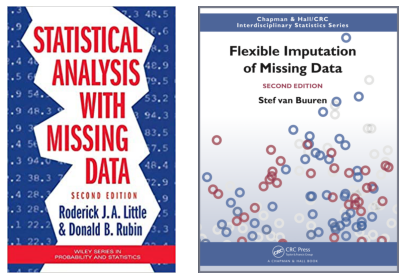

In [21]:
# Flexible Imputation of Missing Data: https://stefvanbuuren.name/fimd/
# Statistical Analysis with Missing Data: https://epdf.pub/statistical-analysis-with-missing-data-wiley-series-in-probability-and-statistic.html
import matplotlib.image as mpimg
from matplotlib import rcParams
# figure size in inches optional
rcParams['figure.figsize'] = 6, 4
# read images
img_A = mpimg.imread('../images/statistical_analysis_with_missing_data.jpg')
img_B = mpimg.imread('../images/flexible_imputation_of_missing_data.png')
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A); ax[0].set_axis_off();
ax[1].imshow(img_B); ax[1].set_axis_off();
fig.tight_layout();

## [Identify missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

In [7]:
# Insert missing values into the dataset
df2 = df.copy()
df2.iloc[[3, 5], [1, 2, 4, 5, 6, 7]] = np.nan
df2

,id,date,age,income,gender,education,passed,measurement
0,1000,2020-04-25,21.0,67000,Male,Bachelors,False,-0.11
1,1001,2020-04-26,56.0,220000,Female,PhD,True,-0.83
2,1002,2020-04-27,33.0,97000,Female,Masters,True,1.79
3,1003,NaT,NaN,166000,NaN,NaN,NaN,NaN
4,1004,2020-04-29,27.0,81000,Male,Bachelors,False,0.00
5,1005,NaT,NaN,157000,NaN,NaN,NaN,NaN
6,1006,2020-05-01,32.0,96000,Female,Bachelors,True,-0.24


In [8]:
# Count the number of missing values in each column
df2.isnull().sum()

id             0
date           2
age            2
income         0
gender         2
education      2
passed         2
measurement    2
dtype: int64

In [9]:
# View the samples that contain missing values
df2[df2.isnull().any(axis=1)]

,id,date,age,income,gender,education,passed,measurement
3,1003,NaT,NaN,166000,NaN,NaN,NaN,NaN
5,1005,NaT,NaN,157000,NaN,NaN,NaN,NaN


In [10]:
# Create indicator variable for missing values in age column
df2['age_imputed'] = np.where(df2['age'].isna(), 1.0, 0.0)
df2

,id,date,age,income,gender,education,passed,measurement,age_imputed
0,1000,2020-04-25,21.0,67000,Male,Bachelors,False,-0.11,0.0
1,1001,2020-04-26,56.0,220000,Female,PhD,True,-0.83,0.0
2,1002,2020-04-27,33.0,97000,Female,Masters,True,1.79,0.0
3,1003,NaT,NaN,166000,NaN,NaN,NaN,NaN,1.0
4,1004,2020-04-29,27.0,81000,Male,Bachelors,False,0.00,0.0
5,1005,NaT,NaN,157000,NaN,NaN,NaN,NaN,1.0
6,1006,2020-05-01,32.0,96000,Female,Bachelors,True,-0.24,0.0


## [Eliminate samples or features with missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

In [11]:
# Remove samples that contain missing values
df2.dropna(axis=0)

,id,date,age,income,gender,education,passed,measurement,age_imputed
0,1000,2020-04-25,21.0,67000,Male,Bachelors,False,-0.11,0.0
1,1001,2020-04-26,56.0,220000,Female,PhD,True,-0.83,0.0
2,1002,2020-04-27,33.0,97000,Female,Masters,True,1.79,0.0
4,1004,2020-04-29,27.0,81000,Male,Bachelors,False,0.00,0.0
6,1006,2020-05-01,32.0,96000,Female,Bachelors,True,-0.24,0.0


In [12]:
# Remove features that contain missing values
df2.dropna(axis=1)

,id,income,age_imputed
0,1000,67000,0.0
1,1001,220000,0.0
2,1002,97000,0.0
3,1003,166000,1.0
4,1004,81000,0.0
5,1005,157000,1.0
6,1006,96000,0.0


## [Fill in missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

### Numeric features

#### pandas

In [13]:
# Fill in missing values with a constant
df2.loc[:, ['age', 'measurement']].fillna(-9999)

,age,measurement
0,21.0,-0.11
1,56.0,-0.83
2,33.0,1.79
3,-9999.0,-9999.00
4,27.0,0.00
5,-9999.0,-9999.00
6,32.0,-0.24


In [16]:
# Fill in missing values with column summary statistics
# df2.loc[:, ['age', 'measurement']]
# df2.mean()[['age','measurement']].round(2)
df2.loc[:, ['age', 'measurement']].fillna(df[['age', 'measurement']].mean())

,age,measurement
0,21.0,-0.110000
1,56.0,-0.830000
2,33.0,1.790000
3,37.0,-0.001429
4,27.0,0.000000
5,37.0,-0.001429
6,32.0,-0.240000


#### [scikit-learn](https://scikit-learn.org/stable/modules/impute.html#impute)

In [17]:
# Fill in missing values with a constant
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-9999)

imputed = imp.fit_transform(df2.loc[:, ['age', 'measurement']].values)

pd.DataFrame(imputed, columns=['age', 'measurement'])

,age,measurement
0,21.0,-0.11
1,56.0,-0.83
2,33.0,1.79
3,-9999.0,-9999.00
4,27.0,0.00
5,-9999.0,-9999.00
6,32.0,-0.24


In [18]:
# Fill in missing values with column summary statistics
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed = imp.fit_transform(df2.loc[:, ['age', 'measurement']].values)

pd.DataFrame(imputed, columns=['age', 'measurement'])

,age,measurement
0,21.0,-0.110
1,56.0,-0.830
2,33.0,1.790
3,33.8,0.122
4,27.0,0.000
5,33.8,0.122
6,32.0,-0.240


In [19]:
# Fill in missing values with average of k-nearest neighbors
knn_imp = KNNImputer(n_neighbors=2, weights="uniform")

imputed = knn_imp.fit_transform(df2.loc[:, ['age', 'measurement']].values)

pd.DataFrame(imputed, columns=['age', 'measurement'])

,age,measurement
0,21.0,-0.110
1,56.0,-0.830
2,33.0,1.790
3,33.8,0.122
4,27.0,0.000
5,33.8,0.122
6,32.0,-0.240


### String features

#### pandas

In [20]:
# Fill in missing values with a constant
df2.loc[:, ['gender', 'education']].fillna('Unknown')

,gender,education
0,Male,Bachelors
1,Female,PhD
2,Female,Masters
3,Unknown,Unknown
4,Male,Bachelors
5,Unknown,Unknown
6,Female,Bachelors


In [21]:
# Fill in missing values with the most frequent column value
df2.loc[:, ['gender', 'education']].fillna(df2.mode().iloc[0])

,gender,education
0,Male,Bachelors
1,Female,PhD
2,Female,Masters
3,Female,Bachelors
4,Male,Bachelors
5,Female,Bachelors
6,Female,Bachelors


#### scikit-learn

In [22]:
# Fill in missing values with a constant
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')

imputed = imp.fit_transform(df2.loc[:, ['gender', 'education']].values)

pd.DataFrame(imputed, columns=['gender', 'education'])

,gender,education
0,Male,Bachelors
1,Female,PhD
2,Female,Masters
3,Unknown,Unknown
4,Male,Bachelors
5,Unknown,Unknown
6,Female,Bachelors


In [23]:
# Fill in missing values with the most frequent column value
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed = imp.fit_transform(df2.loc[:, ['gender', 'education']].values)

pd.DataFrame(imputed, columns=['gender', 'education'])

,gender,education
0,Male,Bachelors
1,Female,PhD
2,Female,Masters
3,Female,Bachelors
4,Male,Bachelors
5,Female,Bachelors
6,Female,Bachelors


### [Date features](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#filling-while-reindexing)

In [24]:
df2.date

0   2020-04-25
1   2020-04-26
2   2020-04-27
3          NaT
4   2020-04-29
5          NaT
6   2020-05-01
Name: date, dtype: datetime64[ns]

In [25]:
# All datetime types
r = pd.date_range(start=df2.date.min(), end=df2.date.max(), freq='D')

df2.select_dtypes('datetime').reindex(r).index.to_list()

[Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-29 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-01 00:00:00')]

In [26]:
def impute_dates(a_df, a_column, col_freq='D'):
    r = pd.date_range(start=a_df[a_column].min(), end=a_df[a_column].max(), freq=col_freq)
    imputed_dates = a_df[a_column].reindex(r).index
    return imputed_dates


list(impute_dates(df2, 'date'))

[Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-29 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-01 00:00:00')]

### [Fill in missing values with weighted random choices](https://docs.python.org/dev/library/random.html#random.choices)

In [27]:
educ_counts = df.education.value_counts()
educ_total  = df.education.value_counts().sum()
educ_pcts   = educ_counts / educ_total

tmp = pd.concat([educ_counts, educ_pcts], axis=1)
tmp.columns = ['count', 'percent']
tmp.round(2)

,count,percent
education,,
Bachelors,4,0.57
Masters,2,0.29
PhD,1,0.14


In [28]:
from random import choices

# The number of missing values in the column: education
num_missing = df2.loc[df2.education.isnull(), 'education'].shape[0]

# Fill in the missing values with selections from the set of non-missing values in the column,
# randomly selected in proportion to their prevalence in the non-missing data
df3 = df2.copy()
df3.loc[df3.education.isnull(), 'education'] = choices(tmp.index, 
                                                       weights=tmp.percent, 
                                                       k=num_missing)

In [29]:
educ_counts3 = df3.education.value_counts()
educ_total3  = df3.education.value_counts().sum()
educ_pcts3   = educ_counts3 / educ_total3

tmp3 = pd.concat([educ_counts3, educ_pcts3], axis=1)
tmp3.columns = ['count', 'percent']
tmp3.round(2)

,count,percent
education,,
Bachelors,5,0.71
PhD,1,0.14
Masters,1,0.14


<a id="center_features"></a>

# [Center features](https://scikit-learn.org/stable/modules/preprocessing.html)

[Why](https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia)/[When](https://statmodeling.stat.columbia.edu/2009/07/11/when_to_standar/) to center and scale features?
  - To improve interpretation
  - To put features on more equal footing
  - To improve numerical stability of some calculations

In [30]:
r = pd.Series(skewnorm.rvs(a=4, loc=10, scale=4, size=1000))
print('mean: {}  standard deviation: {}'.format(round(r.mean(), 1), round(r.std(), 1)))

mean: 13.2  standard deviation: 2.5


#### pandas

In [31]:
r_centered = r.apply(lambda val: val - r.mean())
print('mean (original): {}    mean (centered): {}'.format(round(r.mean()), round(r_centered.mean())))

mean (original): 13    mean (centered): 0


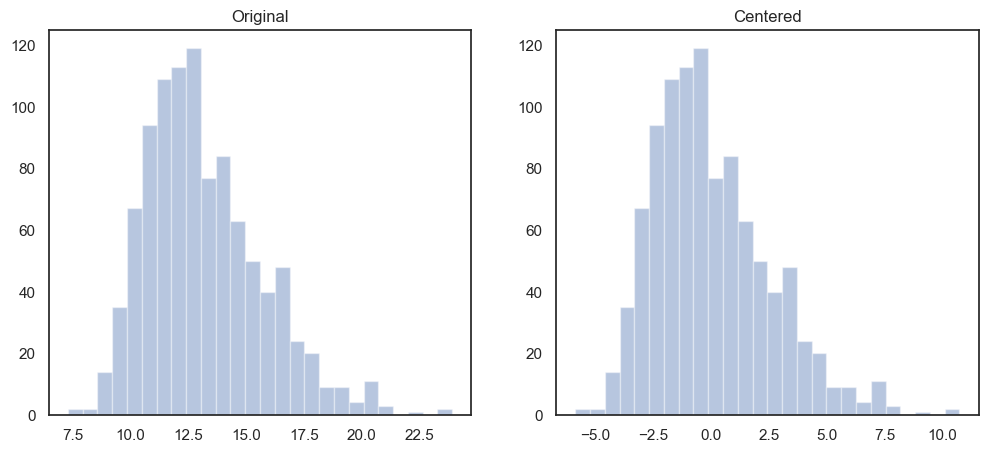

In [32]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
sns.distplot(r,          ax=axes[0], kde=False, rug=False).set_title('Original')
sns.distplot(r_centered, ax=axes[1], kde=False, rug=False).set_title('Centered');

#### scikit-learn

In [33]:
scaler = StandardScaler(with_std=False)

r_centered = scaler.fit_transform(r.values.reshape(-1, 1))
print('mean (original): {}    mean (centered): {}'.format(round(r.mean()), abs(round(r_centered.mean()))))

mean (original): 13    mean (centered): 0


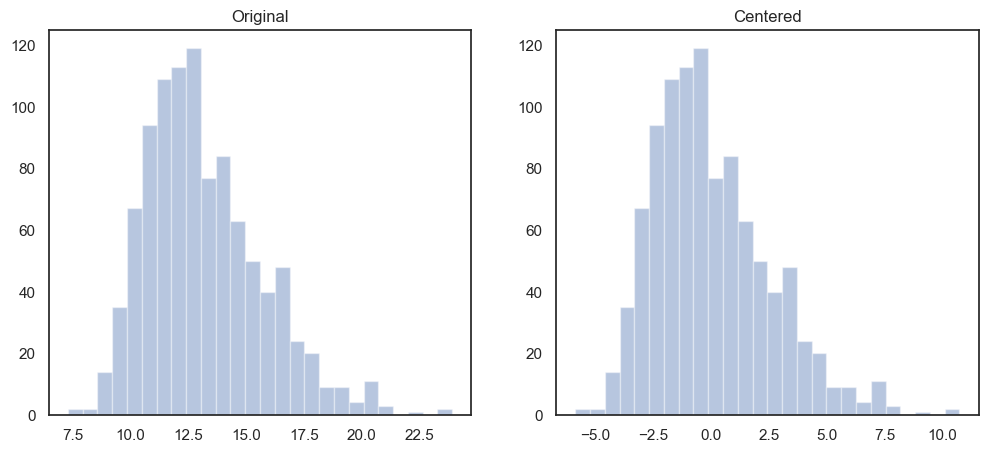

In [34]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
sns.distplot(r,          ax=axes[0], kde=False, rug=False).set_title('Original')
sns.distplot(r_centered, ax=axes[1], kde=False, rug=False).set_title('Centered');

<a id="scale_features"></a>

# [Scale features](https://scikit-learn.org/stable/modules/preprocessing.html)

In [35]:
r = pd.Series(skewnorm.rvs(a=4, loc=10, scale=4, size=1000))
print('mean: {}  standard deviation: {}'.format(round(r.mean(), 1), round(r.std(), 1)))

mean: 12.9  standard deviation: 2.6


#### pandas

In [36]:
r_scaled = r.apply(lambda val: (val - r.mean()) / r.std())
print('mean (original): {}  mean (scaled): {}  \
std (original): {}  std (scaled): {}'.format(round(r.mean(), 1), 
                                             abs(round(r_scaled.mean())),
                                             round(r.std(), 1),
                                             round(r_scaled.std())
                                            ))

mean (original): 12.9  mean (scaled): 0  std (original): 2.6  std (scaled): 1


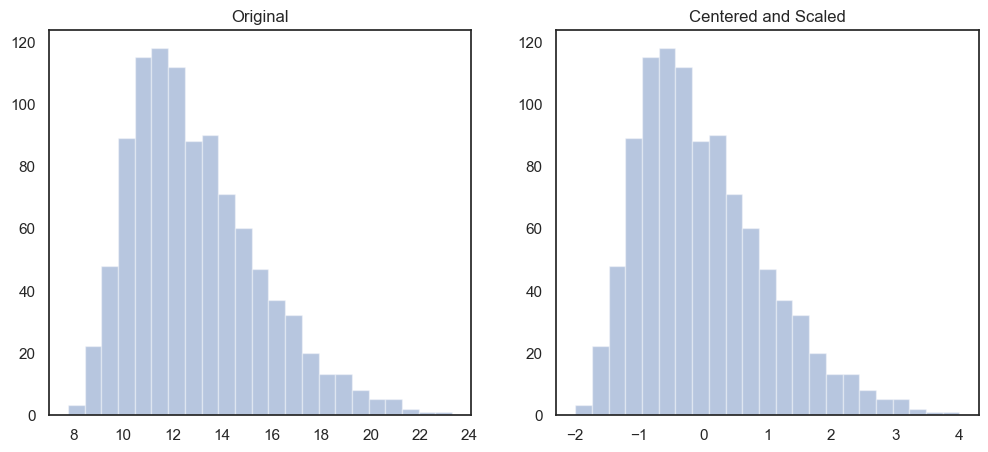

In [37]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
sns.distplot(r,        ax=axes[0], kde=False, rug=False).set_title('Original')
sns.distplot(r_scaled, ax=axes[1], kde=False, rug=False).set_title('Centered and Scaled');

#### scikit-learn

In [38]:
scaler = StandardScaler()

r_scaled = scaler.fit_transform(r.values.reshape(-1, 1))
print('mean (original): {}  mean (scaled): {}  \
std (original): {}  std (scaled): {}'.format(round(r.mean()), 
                                             abs(round(r_scaled.mean())),
                                             round(r.std()),
                                             round(r_scaled.std())
                                            ))

mean (original): 13  mean (scaled): 0  std (original): 3  std (scaled): 1


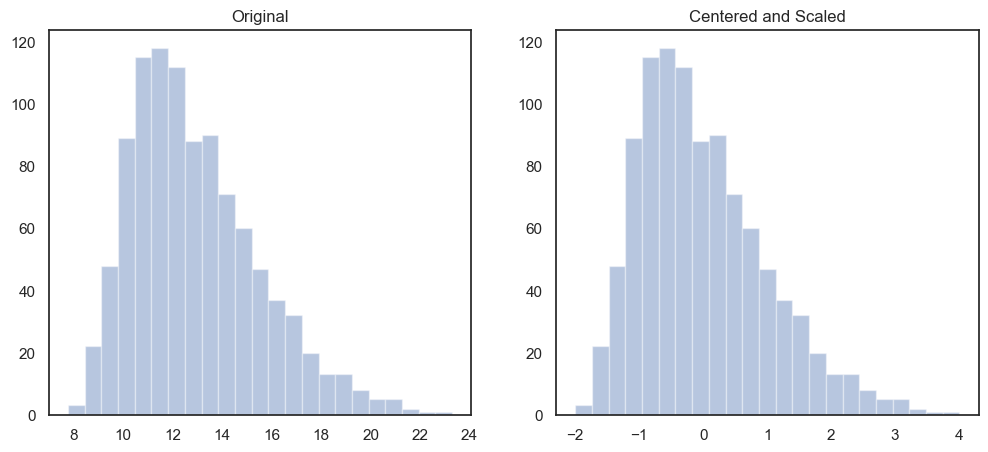

In [39]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
sns.distplot(r,        ax=axes[0], kde=False, rug=False).set_title('Original')
sns.distplot(r_scaled, ax=axes[1], kde=False, rug=False).set_title('Centered and Scaled');

<a id="map_to_gaussian"></a>

# [Map features to a Gaussian distribution](https://docs.scipy.org/doc/scipy/reference/stats.html#transformations)

It's often desirable to have [Normally-distributed features](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution):
  - Stabilizes variance
  - Minimizes skewness

In [40]:
r = pd.Series(skewnorm.rvs(a=4, loc=10, scale=4, size=1000))
print('mean: {}  standard deviation: {}'.format(round(r.mean(), 2), round(r.std(), 2)))

mean: 13.05  standard deviation: 2.32


## Common Transformations to Resolve Skewness

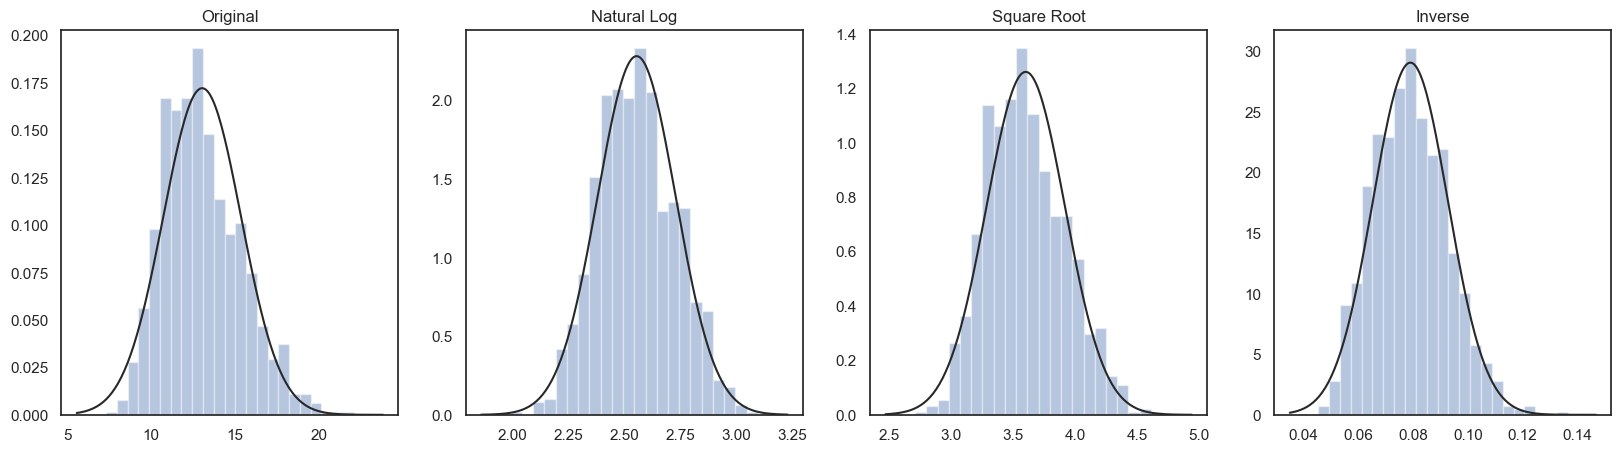

In [41]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=4)
sns.distplot(r,          ax=axes[0], kde=False, rug=False, fit=stats.norm).set_title('Original')
sns.distplot(np.log(r),  ax=axes[1], kde=False, rug=False, fit=stats.norm).set_title('Natural Log') # natural log
sns.distplot(np.sqrt(r), ax=axes[2], kde=False, rug=False, fit=stats.norm).set_title('Square Root') # square root 
sns.distplot(1/r,        ax=axes[3], kde=False, rug=False, fit=stats.norm).set_title('Inverse');    # inverse

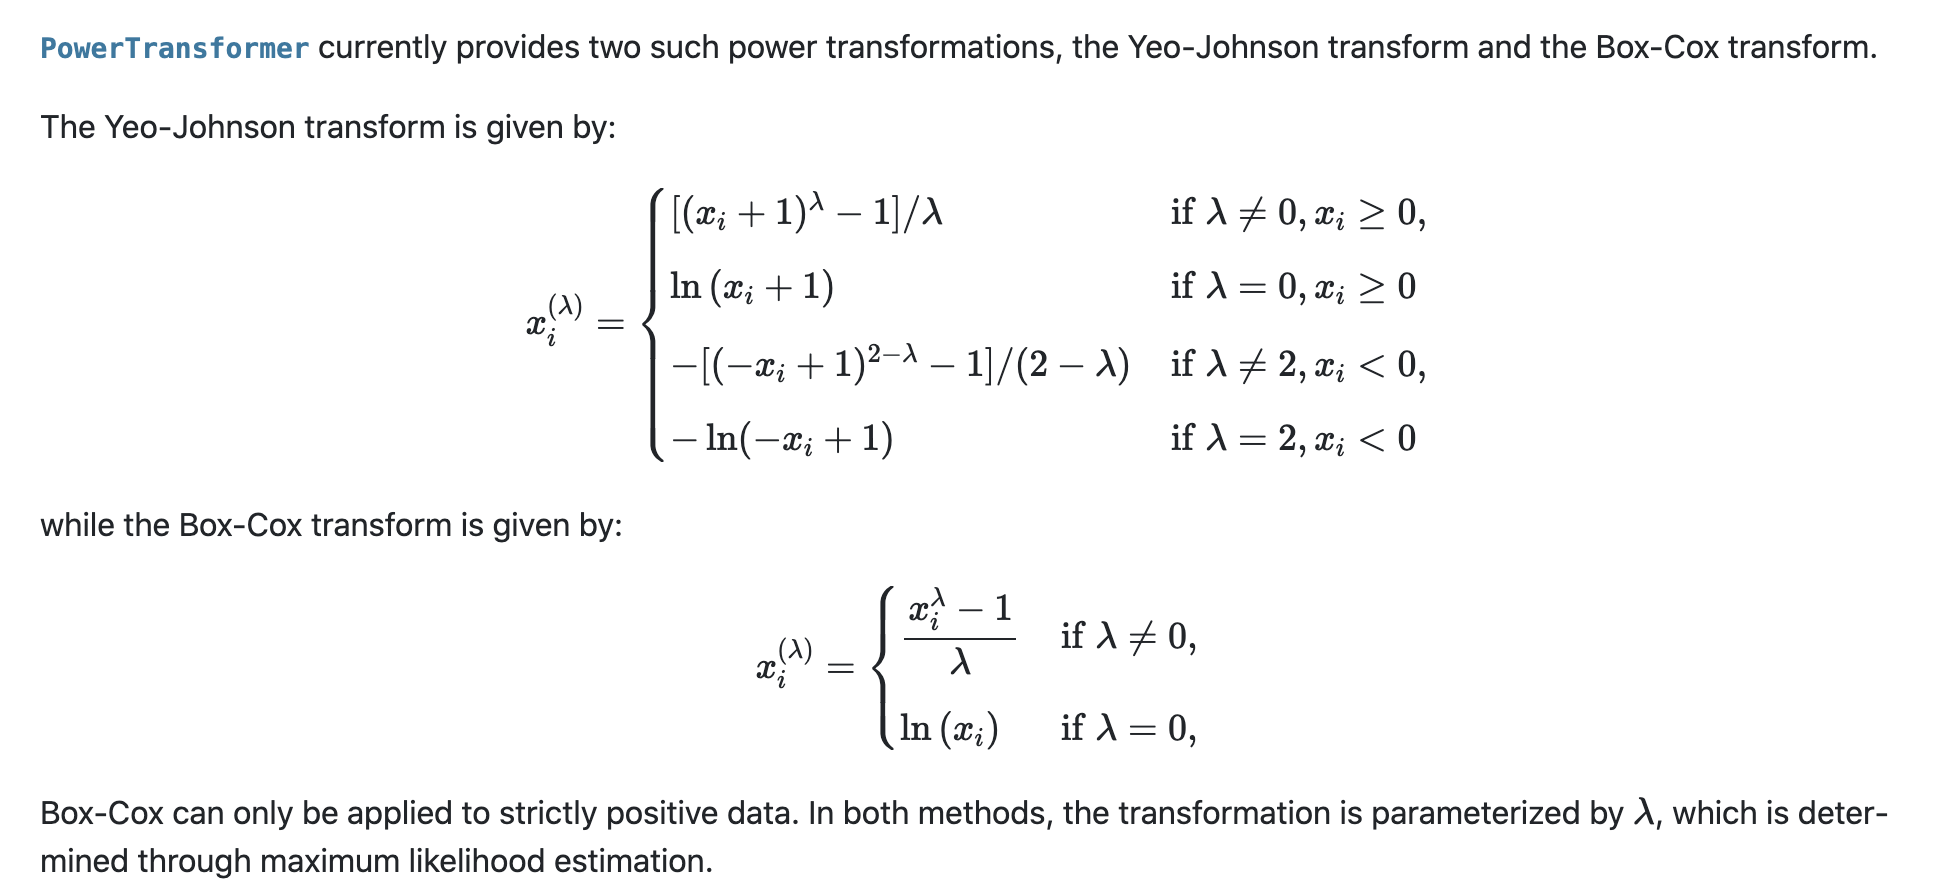

In [54]:
Image(filename='../images/scikit_learn_powertransformer_yeo_johnson_and_box_cox.png', width=600)

#### scipy

In [42]:
r_yj, lambda_ = yeojohnson(r)
print('mean (original): {}  mean (yeo-johnson): {}  \
std (original): {}  std (yeo-johnson): {}  lambda: {}'.format(round(r.mean(), 2), 
                                                              round(r_yj.mean(), 2), 
                                                              round(r.std(), 2), 
                                                              round(r_yj.std(), 2), 
                                                              round(lambda_, 2)
                                                             ))

mean (original): 13.05  mean (yeo-johnson): 1.68  std (original): 2.32  std (yeo-johnson): 0.06  lambda: -0.37


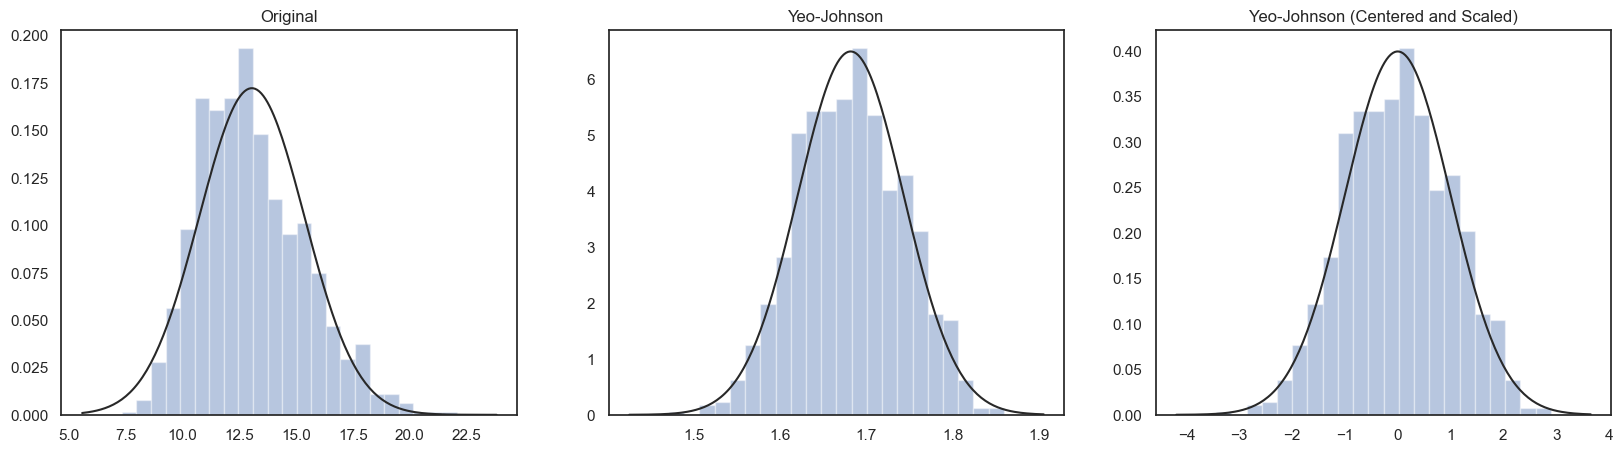

In [43]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.distplot(r,            ax=axes[0], kde=False, rug=False, fit=stats.norm).set_title('Original')
sns.distplot(r_yj,         ax=axes[1], kde=False, rug=False, fit=stats.norm).set_title('Yeo-Johnson')
sns.distplot(zscore(r_yj), ax=axes[2], kde=False, rug=False, fit=stats.norm).set_title('Yeo-Johnson (Centered and Scaled)');

#### [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

In [44]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)

pt.fit(r.values.reshape(-1, 1))

r_yj = pt.transform(r.values.reshape(-1, 1))

print('mean (original): {}  mean (yeo-johnson): {}  \
std (original): {}  std (yeo-johnson): {}  lambda: {}'.format(round(r.mean(), 2), 
                                                              round(r_yj.mean(), 2), 
                                                              round(r.std(), 2), 
                                                              round(r_yj.std(), 2), 
                                                              round(pt.lambdas_[0], 2)
                                                             ))

mean (original): 13.05  mean (yeo-johnson): 1.68  std (original): 2.32  std (yeo-johnson): 0.06  lambda: -0.37


In [45]:
pt = PowerTransformer(method='yeo-johnson')
r_yjs = pt.fit_transform(r.values.reshape(-1, 1))

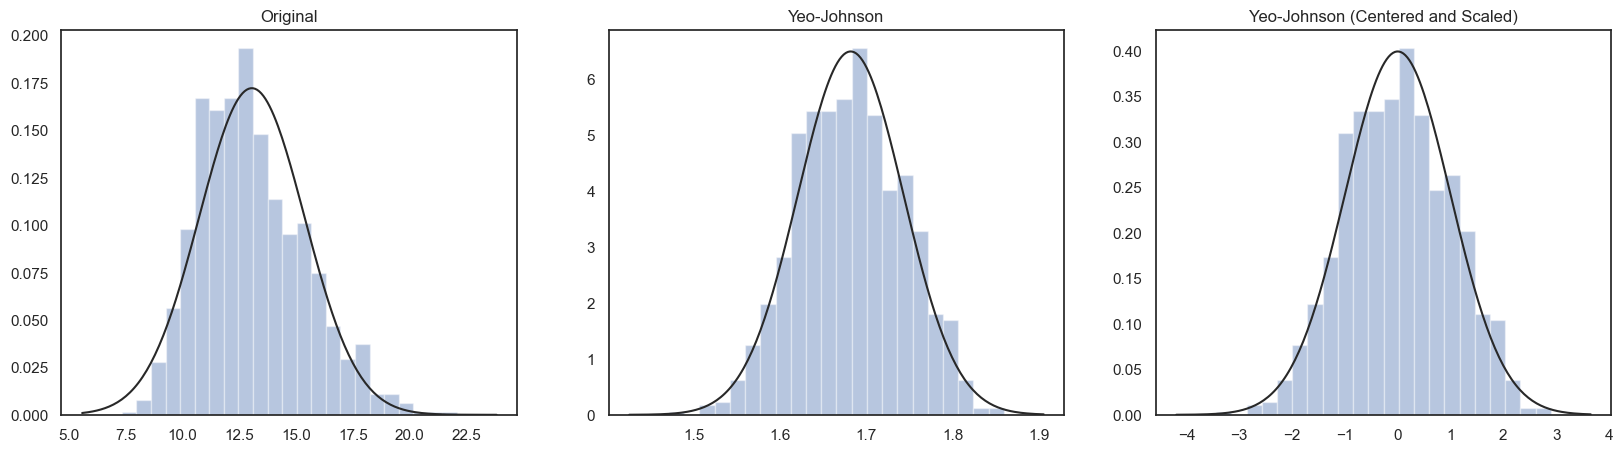

In [46]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.distplot(r,     ax=axes[0], kde=False, rug=False, fit=stats.norm).set_title('Original')
sns.distplot(r_yj,  ax=axes[1], kde=False, rug=False, fit=stats.norm).set_title('Yeo-Johnson')
sns.distplot(r_yjs, ax=axes[2], kde=False, rug=False, fit=stats.norm).set_title('Yeo-Johnson (Centered and Scaled)');

<a id="handle_categorical_data"></a>

# [Handle Categorical Data](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

## Encode categorical features as integers

#### [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [47]:
education_mapping = {'PhD': 3, 'Masters': 2, 'Bachelors': 1}

df['education'].map(education_mapping)

0    1
1    3
2    2
3    2
4    1
5    1
6    1
Name: education, dtype: int64

In [48]:
inverse_education_mapping = {v: k for k, v in education_mapping.items()}
df['education'].map(education_mapping).map(inverse_education_mapping)

0    Bachelors
1          PhD
2      Masters
3      Masters
4    Bachelors
5    Bachelors
6    Bachelors
Name: education, dtype: object

In [49]:
gender_mapping = {gender: idx for idx, gender in enumerate(df['gender'].unique())}
gender_mapping

{'Male': 0, 'Female': 1}

In [50]:
df['female'] = df['gender'].map(gender_mapping)
df

,id,date,age,income,gender,education,passed,measurement,female
0,1000,2020-04-25,21,67000,Male,Bachelors,False,-0.11,0
1,1001,2020-04-26,56,220000,Female,PhD,True,-0.83,1
2,1002,2020-04-27,33,97000,Female,Masters,True,1.79,1
3,1003,2020-04-28,48,166000,Male,Masters,True,0.17,0
4,1004,2020-04-29,27,81000,Male,Bachelors,False,0.00,0
5,1005,2020-04-30,42,157000,Female,Bachelors,False,-0.79,1
6,1006,2020-05-01,32,96000,Female,Bachelors,True,-0.24,1


#### [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

In [51]:
enc = OrdinalEncoder()

df['education_numeric'] = enc.fit_transform(df['education'].values.reshape(-1, 1))
df

,id,date,age,income,gender,education,passed,measurement,female,education_numeric
0,1000,2020-04-25,21,67000,Male,Bachelors,False,-0.11,0,0.0
1,1001,2020-04-26,56,220000,Female,PhD,True,-0.83,1,2.0
2,1002,2020-04-27,33,97000,Female,Masters,True,1.79,1,1.0
3,1003,2020-04-28,48,166000,Male,Masters,True,0.17,0,1.0
4,1004,2020-04-29,27,81000,Male,Bachelors,False,0.00,0,0.0
5,1005,2020-04-30,42,157000,Female,Bachelors,False,-0.79,1,0.0
6,1006,2020-05-01,32,96000,Female,Bachelors,True,-0.24,1,0.0


<a id="create_indicator_variables"></a>

## [Create dummy/indicator variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))

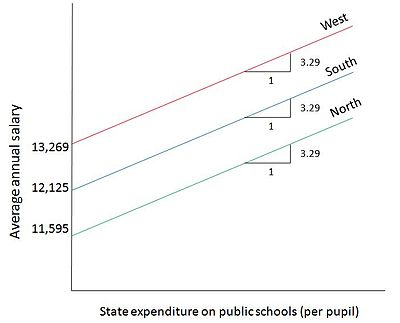

In [65]:
Image(filename='../images/dummy_variables_intercept_shifts.jpg', width=350)

#### [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [52]:
pd.get_dummies(df['education'])

,Bachelors,Masters,PhD
0,True,False,False
1,False,False,True
2,False,True,False
3,False,True,False
4,True,False,False
5,True,False,False
6,True,False,False


In [53]:
pd.get_dummies(df['education'], drop_first=True)

,Masters,PhD
0,False,False
1,False,True
2,True,False
3,True,False
4,False,False
5,False,False
6,False,False


In [54]:
educ_dummies = pd.get_dummies(df['education'], drop_first=True)

tmp = pd.concat([df, educ_dummies], axis=1)
tmp

,id,date,age,income,gender,education,passed,measurement,female,education_numeric,Masters,PhD
0,1000,2020-04-25,21,67000,Male,Bachelors,False,-0.11,0,0.0,False,False
1,1001,2020-04-26,56,220000,Female,PhD,True,-0.83,1,2.0,False,True
2,1002,2020-04-27,33,97000,Female,Masters,True,1.79,1,1.0,True,False
3,1003,2020-04-28,48,166000,Male,Masters,True,0.17,0,1.0,True,False
4,1004,2020-04-29,27,81000,Male,Bachelors,False,0.00,0,0.0,False,False
5,1005,2020-04-30,42,157000,Female,Bachelors,False,-0.79,1,0.0,False,False
6,1006,2020-05-01,32,96000,Female,Bachelors,True,-0.24,1,0.0,False,False


#### [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

In [55]:
ohe = OneHotEncoder()
ohe.fit_transform( df['education'].values.reshape(-1, 1) ).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [56]:
ohe = OneHotEncoder(drop='first')
ohe.fit_transform( df['education'].values.reshape(-1, 1) ).toarray()

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [57]:
educ_indicators = pd.DataFrame(ohe.fit_transform( df['education'].values.reshape(-1, 1) ).toarray(), 
                               columns=['Masters', 'PhD'])

tmp2 = pd.concat([df, educ_indicators], axis=1)
tmp2

,id,date,age,income,gender,education,passed,measurement,female,education_numeric,Masters,PhD
0,1000,2020-04-25,21,67000,Male,Bachelors,False,-0.11,0,0.0,0.0,0.0
1,1001,2020-04-26,56,220000,Female,PhD,True,-0.83,1,2.0,0.0,1.0
2,1002,2020-04-27,33,97000,Female,Masters,True,1.79,1,1.0,1.0,0.0
3,1003,2020-04-28,48,166000,Male,Masters,True,0.17,0,1.0,1.0,0.0
4,1004,2020-04-29,27,81000,Male,Bachelors,False,0.00,0,0.0,0.0,0.0
5,1005,2020-04-30,42,157000,Female,Bachelors,False,-0.79,1,0.0,0.0,0.0
6,1006,2020-05-01,32,96000,Female,Bachelors,True,-0.24,1,0.0,0.0,0.0


## Encode class labels as integers

#### [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [58]:
passed_mapping = {True: 1, False: 0}
df['passed'].map(passed_mapping)

0    0
1    1
2    1
3    1
4    0
5    0
6    1
Name: passed, dtype: int64

In [59]:
education_mapping = {'PhD': 2, 'Masters': 1, 'Bachelors': 0}
df['education'].map(education_mapping)

0    0
1    2
2    1
3    1
4    0
5    0
6    0
Name: education, dtype: int64

#### [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [60]:
le = LabelEncoder()

y  = le.fit_transform(df['passed'])
y

array([0, 1, 1, 1, 0, 0, 1])

In [61]:
education = le.fit_transform(df['education'])
education

array([0, 2, 1, 1, 0, 0, 0])

[Back to top](#top)